# Data Visualization
### Activity 2 -Exploratory Data Analysis I
24th November 2023 <br> Fall 2023

---
### **Group 36:**
Tomás Bensimon - 43022 <br>
Cristina Tiago - 58636 <br>
Martim Esteves - 46953 <br>

---

### Imports & Setup

In [54]:
import os
path = os.path.join(os.getcwd(), 'Dataset')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

# Color Setup

color_pallete = ["#15291C", "#5E5361", "#A697B0", "#EBE9EC",
                 "#97B9C0"]
color_pallete2 = ["#edf8fb", "#b3cde3", "#8c96c6", "#8856a7",
                 "#810f7c"]
sns.set_style("dark")
display(sns.color_palette(color_pallete))
display(sns.color_palette(color_pallete2))
sns.set_palette(sns.color_palette(color_pallete))

[(0.08235294117647059, 0.1607843137254902, 0.10980392156862745),
 (0.3686274509803922, 0.3254901960784314, 0.3803921568627451),
 (0.6509803921568628, 0.592156862745098, 0.6901960784313725),
 (0.9215686274509803, 0.9137254901960784, 0.9254901960784314),
 (0.592156862745098, 0.7254901960784313, 0.7529411764705882)]

[(0.9294117647058824, 0.9725490196078431, 0.984313725490196),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.5490196078431373, 0.5882352941176471, 0.7764705882352941),
 (0.5333333333333333, 0.33725490196078434, 0.6549019607843137),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [3]:
athlete_events = pd.read_csv(os.path.join(path, 'athlete_events.csv'))
display(athlete_events.head(5))
country_definitions = pd.read_csv(os.path.join(path, 'country_definitions.csv'))
display(country_definitions.head(5))
gdp = pd.read_csv(os.path.join(path, 'gdp_csv.csv'))
display(gdp.head(5))
population = pd.read_csv(os.path.join(path, 'population.csv'))
display(population.head(5))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,25760683041.09
1,Arab World,ARB,1969,28434203615.48
2,Arab World,ARB,1970,31385499664.07
3,Arab World,ARB,1971,36426909888.39
4,Arab World,ARB,1972,43316056615.46


,geo,name,time,Population
0,afg,Afghanistan,1800,3280000.00
1,afg,Afghanistan,1801,3280000.00
2,afg,Afghanistan,1802,3280000.00
3,afg,Afghanistan,1803,3280000.00
4,afg,Afghanistan,1804,3280000.00


### General Data Exploration

In [4]:
print('Athlete Events - ', athlete_events.shape[0], 'rows and', athlete_events.shape[1], 'columns')
print('Country Definitions - ', country_definitions.shape[0], 'rows and', country_definitions.shape[1], 'columns')
print('GDP - ', gdp.shape[0], 'rows and', gdp.shape[1], 'columns')
print('Population - ', population.shape[0], 'rows and', population.shape[1], 'columns')

Athlete Events -  271116 rows and 15 columns
Country Definitions -  230 rows and 3 columns
GDP -  11507 rows and 4 columns
Population -  59297 rows and 4 columns


In [5]:
for column in athlete_events.columns:
    print(column, '-', athlete_events[column].dtype)

ID - int64
Name - object
Sex - object
Age - float64
Height - float64
Weight - float64
Team - object
NOC - object
Games - object
Year - int64
Season - object
City - object
Sport - object
Event - object
Medal - object


In [6]:
for column in gdp.columns:
    print(column, '-', gdp[column].dtype)

Country Name - object
Country Code - object
Year - int64
Value - float64


In [7]:
for column in population.columns:
    print(column, '-', population[column].dtype)

geo - object
name - object
time - int64
Population - float64


### Missing Values

In [8]:
for column in athlete_events.columns:
    print(column, '-', athlete_events[column].isna().sum())

ID - 0
Name - 0
Sex - 0
Age - 9474
Height - 60171
Weight - 62875
Team - 0
NOC - 0
Games - 0
Year - 0
Season - 0
City - 0
Sport - 0
Event - 0
Medal - 231333


In [9]:
for column in gdp.columns:
    print(column, '-', gdp[column].isna().sum())

Country Name - 0
Country Code - 0
Year - 0
Value - 0


In [10]:
for column in population.columns:
    print(column, '-', population[column].isna().sum())

geo - 0
name - 0
time - 0
Population - 100


### Intermediary Calculations
- Age - Frequency Distribution

In [11]:
age_freq = athlete_events['Age'].value_counts().sort_index()
display(age_freq)

Age
10.00      1
11.00     13
12.00     39
13.00    187
14.00    837
        ... 
81.00      2
84.00      1
88.00      3
96.00      1
97.00      1
Name: count, Length: 74, dtype: int64

- Age - Range, Outliers, nulls or invalids

In [12]:
age_max = athlete_events['Age'].max()
age_min = athlete_events['Age'].min()
age_q1 = athlete_events['Age'].quantile(0.25)
age_q2 = athlete_events['Age'].quantile(0.5)
age_q3 = athlete_events['Age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_outliers = athlete_events['Age'][(athlete_events['Age']<age_q1-1.5*age_iqr)|(athlete_events['Age']>age_q3+1.5*age_iqr)].count()
age_values_count = (athlete_events['Age'].isnull()).sum()
print('Max Age:', age_max, '\nMin Age:', age_min, '\nAge Range:', age_max - age_min)
print('Q1:', age_q1, '\nQ2:', age_q2, '\nQ3:', age_q3, '\nIQR:', age_iqr, '\nNumber of Outliers:', age_outliers,
       '({}%)'.format(round((age_outliers/(athlete_events['Age'].notna()).sum())*100,2)))

Max Age: 97.0 
Min Age: 10.0 
Age Range: 87.0
Q1: 21.0 
Q2: 24.0 
Q3: 28.0 
IQR: 7.0 
Number of Outliers: 10317 (3.94%)


### Plotting
- Age - Frequency Distribution

<Axes: xlabel='Age'>

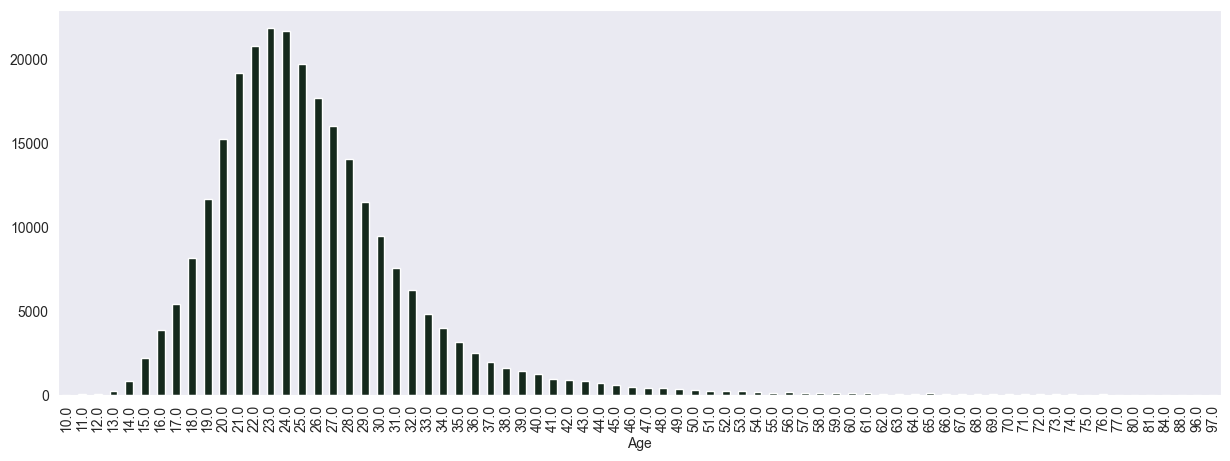

In [46]:
age_freq.plot(kind='bar', figsize=(15, 5))

C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

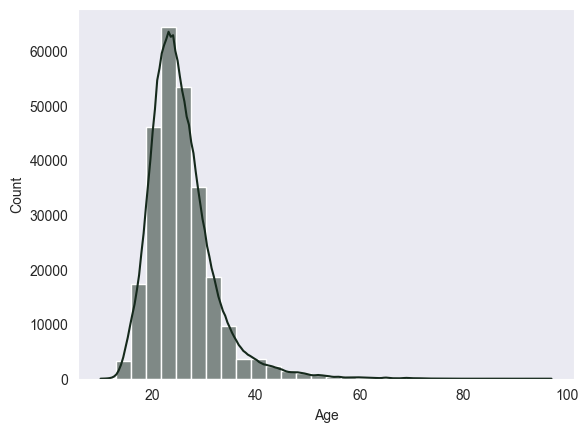

In [45]:
sns.histplot(data=athlete_events, x=athlete_events['Age'], bins= 30, color=color_pallete[0], kde=True)

C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


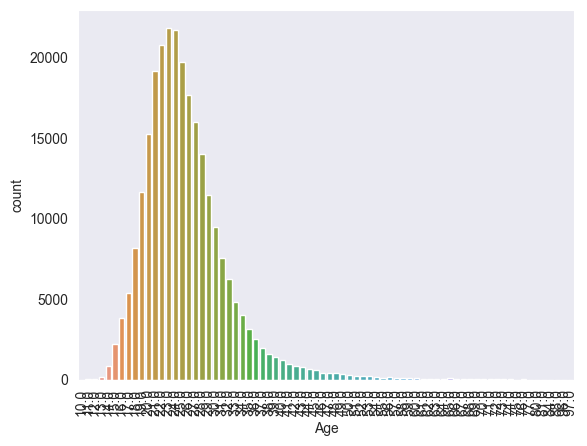

In [41]:
sns.barplot(x='Age', y='count', data=age_freq.reset_index())
plt.xticks(rotation=90)
plt.show()

- Age - Range, Outliers, nulls or invalids

<Axes: >

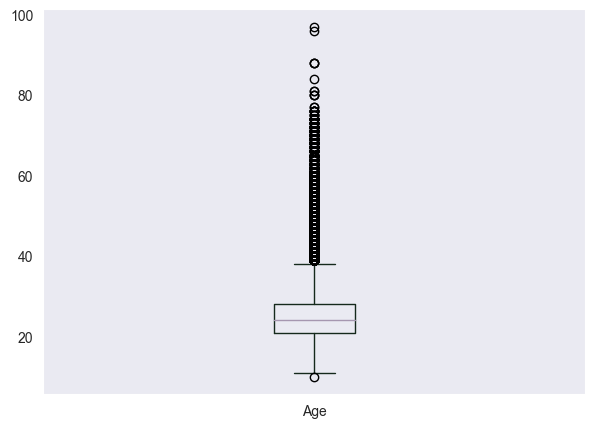

In [48]:
athlete_events['Age'].plot(kind='box', figsize=(7, 5))

C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Age'>

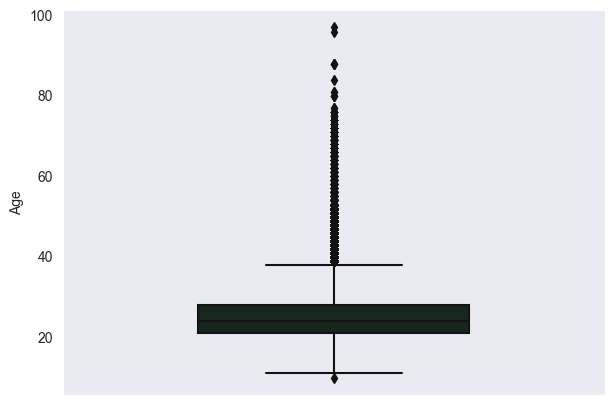

In [47]:
plt.figure(figsize=(7, 5))
sns.boxplot(y=athlete_events['Age'], data=athlete_events, width=0.5)